In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
%matplotlib inline

import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist # looks at how frequent words are used
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

In [2]:
df = pd.read_csv('../data/lemmatized_and_sentiment_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,tweet,product_,emotion,lemmatizer_tweets,textblob_polarity,textblob_subjectivity,vs_neg,vs_neu,vs_pos,vs_compound
0,0,"['wesley83', 'have', '3G', 'iPhone', '3', 'hrs...",iPhone,0,wesley83 have 3G iPhone 3 hr tweeting RISE Aus...,-0.200000,0.400000,0.223,0.777,0.000,-0.6486
1,1,"['jessedee', 'Know', 'fludapp', 'Awesome', 'iP...",iPad or iPhone App,1,jessedee Know fludapp Awesome iPad iPhone app ...,0.466667,0.933333,0.000,0.528,0.472,0.9100
2,2,"['swonderlin', 'not', 'wait', 'iPad', '2', 'al...",iPad,1,swonderlin not wait iPad 2 also should sale do...,-0.155556,0.288889,0.000,1.000,0.000,0.0000
3,3,"['sxsw', 'hope', 'year', 'festival', 't', 'cra...",iPad or iPhone App,0,sxsw hope year festival t crashy this year iPh...,0.000000,0.000000,0.000,0.596,0.404,0.7269
4,4,"['sxtxstate', 'great', 'stuff', 'Fri', 'SXSW',...",Google,1,sxtxstate great stuff Fri SXSW Marissa Mayer G...,0.800000,0.750000,0.000,0.796,0.204,0.6249


In [4]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [5]:
cond_list = [df['product_'] == 'Google',
             df['product_'] == 'Other Google product or service',
            df['product_'] == 'Unknown',
            df['product_'] == 'Android',
            df['product_'] == 'Android App']
choice_list = ['Google','Google','Unknown','Android','Android']


df['product_agg'] = np.select(cond_list,choice_list, 'Apple')

In [6]:
df.head()

,tweet,product_,emotion,lemmatizer_tweets,textblob_polarity,textblob_subjectivity,vs_neg,vs_neu,vs_pos,vs_compound,product_agg
0,"['wesley83', 'have', '3G', 'iPhone', '3', 'hrs...",iPhone,0,wesley83 have 3G iPhone 3 hr tweeting RISE Aus...,-0.200000,0.400000,0.223,0.777,0.000,-0.6486,Apple
1,"['jessedee', 'Know', 'fludapp', 'Awesome', 'iP...",iPad or iPhone App,1,jessedee Know fludapp Awesome iPad iPhone app ...,0.466667,0.933333,0.000,0.528,0.472,0.9100,Apple
2,"['swonderlin', 'not', 'wait', 'iPad', '2', 'al...",iPad,1,swonderlin not wait iPad 2 also should sale do...,-0.155556,0.288889,0.000,1.000,0.000,0.0000,Apple
3,"['sxsw', 'hope', 'year', 'festival', 't', 'cra...",iPad or iPhone App,0,sxsw hope year festival t crashy this year iPh...,0.000000,0.000000,0.000,0.596,0.404,0.7269,Apple
4,"['sxtxstate', 'great', 'stuff', 'Fri', 'SXSW',...",Google,1,sxtxstate great stuff Fri SXSW Marissa Mayer G...,0.800000,0.750000,0.000,0.796,0.204,0.6249,Google


In [7]:
def pos_dict_creation(blurb):
    tokenizer = RegexpTokenizer(r"(iPad\s2|[a-zA-Z0-9-]+'?\w+)")
    tokenized = tokenizer.tokenize(blurb)
    tagged = nltk.pos_tag(tokenized)
    
    dict_1 =dict ()
    for word, postag in tagged:
        dict_1.setdefault(postag, []).append(word)
    return dict_1

In [8]:
df['pos'] = df['tweet'].map(lambda x: pos_dict_creation(x))

In [9]:
df['tweet'][1]

"['jessedee', 'Know', 'fludapp', 'Awesome', 'iPad', 'iPhone', 'app', 'you', 'likely', 'appreciate', 'its', 'design', 'Also', 're', 'giving', 'free', 'Ts', 'SXSW']"

In [10]:
df['pos'][1]

{'NN': ['jessedee', 'iPad', 'iPhone', 'app', 'design'],
 'NNP': ['Know', 'Awesome', 'Ts', 'SXSW'],
 'VBZ': ['fludapp', 're'],
 'PRP': ['you'],
 'JJ': ['likely', 'free'],
 'VB': ['appreciate'],
 'PRP$': ['its'],
 'RB': ['Also'],
 'VBG': ['giving']}

In [11]:
example_dict = {'NN': ['jessedee', 'iPad', 'iPhone', 'app', 'design'],
 'NNP': ['Know', 'Awesome', 'Ts', 'SXSW'],
 'VBZ': ['fludapp', 're'],
 'PRP': ['you'],
 'JJ': ['likely', 'free'],
 'VB': ['appreciate'],
 'PRP$': ['its'],
 'RB': ['Also'],
 'VBG': ['giving']}

for key, value in example_dict.items():
    if key == 'NN':
        example = value
example

['jessedee', 'iPad', 'iPhone', 'app', 'design']

In [12]:
def pos_unpack(dictionary, pos):
    for key, value in dictionary.items():
        if key == pos:
            return value

In [13]:
df['NN'] = df['pos'].map(lambda x: pos_unpack(x,'NN'))

In [14]:
df.tail()

,tweet,product_,emotion,lemmatizer_tweets,textblob_polarity,textblob_subjectivity,vs_neg,vs_neu,vs_pos,vs_compound,product_agg,pos,NN
9087,"['Ipad', 'everywhere', 'SXSW', 'link']",iPad,1,Ipad everywhere SXSW link,0.000000,0.000000,0.000,1.000,0.0,0.0000,Apple,"{'NNP': ['Ipad', 'SXSW'], 'RB': ['everywhere']...",[link]
9088,"['Wave', 'buzz', 'RT', 'mention', 'interrupt',...",Unknown,3,Wave buzz RT mention interrupt regularly sched...,0.000000,0.088462,0.244,0.756,0.0,-0.4939,Unknown,"{'NNP': ['Wave', 'RT'], 'NN': ['buzz', 'mentio...","[buzz, mention, sxsw, geek, news, link, google]"
9089,"['Google', 'Zeiger', 'physician', 'never', 're...",Unknown,3,Google Zeiger physician never reported potenti...,0.000000,1.000000,0.000,1.000,0.0,0.0000,Unknown,"{'NNP': ['Google', 'Zeiger', 'AE', 'Yet', 'FDA...","[physician, re, health2dev]"
9090,"['Verizon', 'iPhone', 'customers', 'complained...",Unknown,3,Verizon iPhone customer complained time fell b...,-0.054545,0.218182,0.162,0.838,0.0,-0.4019,Unknown,"{'NNP': ['Verizon', 'New', 'SXSW'], 'NN': ['iP...","[iPhone, time, hour, weekend, course]"
9091,"['RT', 'mention', 'Google', 'Tests', 'Check', ...",Unknown,3,RT mention Google Tests Check Offers SXSW link,0.100000,0.000000,0.000,1.000,0.0,0.0000,Unknown,"{'NNP': ['RT', 'Google', 'Tests', 'Check', 'Of...","[mention, link]"


In [15]:
def word_count_func2(data):
    #already tokenized prior to tagging; here getting everything in 
    #a big list to process
    giant_list =[] 
    for x in data:
        giant_list.append(x)
    
    #No lemmatizing needed as this is POS tagged 
    
    #Removing empty lists to make it iterable
    giant_list_cleaned = []
    for x in giant_list:
        if x is not None:
            giant_list_cleaned.append(x)
    
    #Flattening (going from a list of lists to one single list) the POS for freq
    flat_pos = [item for sublist in giant_list_cleaned for item in sublist]   
    
    #did not use lower function because needed to differentiate between 
    #proper nouns and nouns but want get consistent formatting here:
    flat_pos2 = []
    for word in flat_pos:
        x = word.lower()
        flat_pos2.append(x)
    
    #This is more descriptive info - calculating the unique vocab of the subset
    overall_vocab = set()
    for word in flat_pos2:
        overall_vocab.update(word)
    print(f'Overall vocab of subset: {len(overall_vocab)}')
    
    #applying nltk freqdist function to the flat list
    pos_freq = FreqDist(flat_pos2)
    print('25 most common words in subset:')
    print(pos_freq.most_common(25))
    
    #returning normalized word freq because there are different N's
    total_words = sum(pos_freq.values())
    top_25 = pos_freq.most_common(25)
    print("Word \t\t Normalized Frequency")
    print()
    for word in top_25:
        normalized_frequency = word[1]/total_words
        print("{} \t\t {:.4}".format(word[0], normalized_frequency))
        
    #Creating word clouds - input is a dict with key word value num of occurences 
    word_dict = dict(top_25)
    from wordcloud import WordCloud
    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(word_dict)
    
    # Display the generated image w/ matplotlib:

    plt.figure(figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Overall vocab of subset: 36
25 most common words in subset:
[('mention', 7055), ('sxsw', 3433), ('link', 3074), ('ipad', 1487), ('iphone', 1351), ('store', 1025), ('quot', 940), ('app', 432), ('apple', 430), ('amp', 407), ('pop', 403), ('line', 361), ('google', 359), ('today', 341), ('ipad2', 338), ('party', 281), ('time', 246), ('launch', 224), ('downtown', 189), ('day', 185), ('popup', 159), ('network', 154), ('sxswi', 149), ('panel', 136), ('year', 126)]
Word 		 Normalized Frequency

mention 		 0.1744
sxsw 		 0.08488
link 		 0.076
ipad 		 0.03677
iphone 		 0.0334
store 		 0.02534
quot 		 0.02324
app 		 0.01068
apple 		 0.01063
amp 		 0.01006
pop 		 0.009964
line 		 0.008925
google 		 0.008876
today 		 0.008431
ipad2 		 0.008357
party 		 0.006948
time 		 0.006082
launch 		 0.005538
downtown 		 0.004673
day 		 0.004574
popup 		 0.003931
network 		 0.003808
sxswi 		 0.003684
panel 		 0.003363
year 		 0.003115


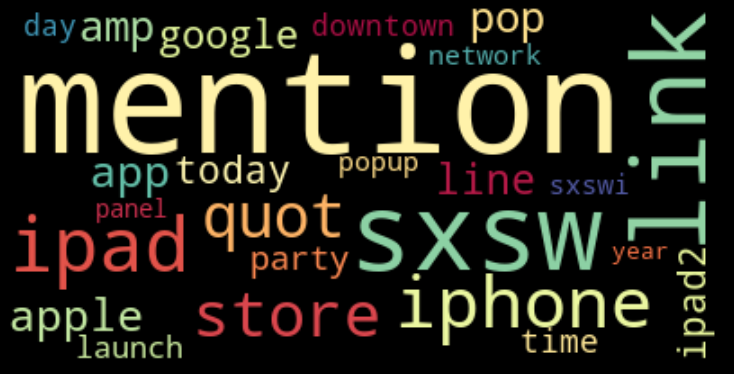

In [16]:
NN = df['NN']
word_count_func2(NN)

Overall vocab of subset: 35
25 most common words in subset:
[('mention', 1650), ('sxsw', 873), ('link', 705), ('ipad', 658), ('iphone', 561), ('store', 410), ('quot', 216), ('app', 215), ('apple', 205), ('pop', 158), ('ipad2', 143), ('line', 129), ('amp', 81), ('time', 77), ('day', 73), ('downtown', 71), ('launch', 56), ('today', 54), ('popup', 53), ('technology', 50), ('year', 49), ('design', 47), ('apps', 44), ('don', 43), ('case', 41)]
Word 		 Normalized Frequency

mention 		 0.1457
sxsw 		 0.07707
link 		 0.06224
ipad 		 0.05809
iphone 		 0.04952
store 		 0.03619
quot 		 0.01907
app 		 0.01898
apple 		 0.0181
pop 		 0.01395
ipad2 		 0.01262
line 		 0.01139
amp 		 0.00715
time 		 0.006797
day 		 0.006444
downtown 		 0.006268
launch 		 0.004944
today 		 0.004767
popup 		 0.004679
technology 		 0.004414
year 		 0.004326
design 		 0.004149
apps 		 0.003884
don 		 0.003796
case 		 0.003619


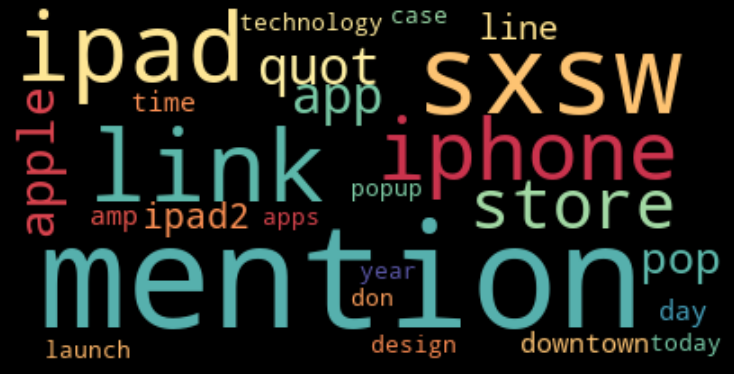

In [17]:
NN_apple = df.loc[df['product_agg']=='Apple','NN']
word_count_func2(NN_apple)

Overall vocab of subset: 30
25 most common words in subset:
[('mention', 112), ('sxsw', 85), ('link', 47), ('app', 32), ('android', 14), ('party', 13), ('time', 10), ('iphone', 10), ('market', 9), ('re', 8), ('phone', 8), ('team', 7), ('amp', 6), ('dev', 6), ('share', 5), ('quot', 5), ('meetup', 5), ('version', 5), ('game', 4), ('schedule', 4), ('gt', 4), ('apps', 4), ('fan', 3), ('fail', 3), ('job', 3)]
Word 		 Normalized Frequency

mention 		 0.1694
sxsw 		 0.1286
link 		 0.0711
app 		 0.04841
android 		 0.02118
party 		 0.01967
time 		 0.01513
iphone 		 0.01513
market 		 0.01362
re 		 0.0121
phone 		 0.0121
team 		 0.01059
amp 		 0.009077
dev 		 0.009077
share 		 0.007564
quot 		 0.007564
meetup 		 0.007564
version 		 0.007564
game 		 0.006051
schedule 		 0.006051
gt 		 0.006051
apps 		 0.006051
fan 		 0.004539
fail 		 0.004539
job 		 0.004539


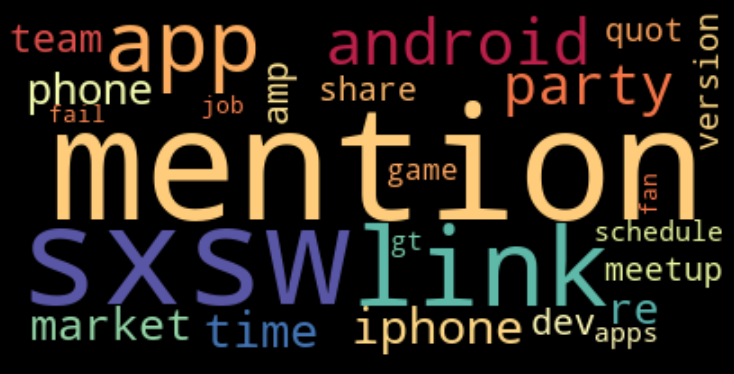

In [18]:
NN_android = df.loc[df['product_agg']=='Android','NN']
word_count_func2(NN_android)

Overall vocab of subset: 34
25 most common words in subset:
[('mention', 488), ('sxsw', 353), ('link', 151), ('google', 125), ('quot', 104), ('party', 71), ('time', 35), ('day', 31), ('network', 30), ('search', 28), ('today', 26), ('panel', 22), ('traffic', 22), ('location', 21), ('launch', 20), ('product', 18), ('gt', 16), ('route', 16), ('world', 15), ('amp', 14), ('art', 13), ('tv', 12), ('session', 12), ('stuff', 11), ('work', 10)]
Word 		 Normalized Frequency

mention 		 0.1628
sxsw 		 0.1178
link 		 0.05038
google 		 0.04171
quot 		 0.0347
party 		 0.02369
time 		 0.01168
day 		 0.01034
network 		 0.01001
search 		 0.009343
today 		 0.008675
panel 		 0.007341
traffic 		 0.007341
location 		 0.007007
launch 		 0.006673
product 		 0.006006
gt 		 0.005339
route 		 0.005339
world 		 0.005005
amp 		 0.004671
art 		 0.004338
tv 		 0.004004
session 		 0.004004
stuff 		 0.00367
work 		 0.003337


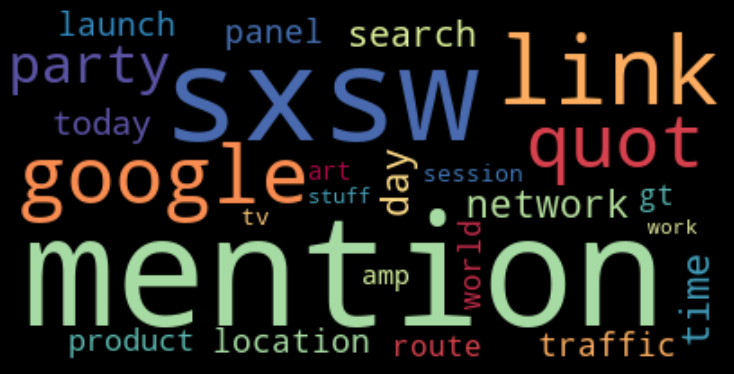

In [19]:
NN_google = df.loc[df['product_agg']=='Google','NN']
word_count_func2(NN_google)

Overall vocab of subset: 20
25 most common words in subset:
[('sxsw', 3), ('iphone', 2), ('quot', 2), ('floor', 1), ('ipod', 1), ('butt', 1), ('ipad', 1), ('envy', 1), ('battery', 1), ('life', 1)]
Word 		 Normalized Frequency

sxsw 		 0.2143
iphone 		 0.1429
quot 		 0.1429
floor 		 0.07143
ipod 		 0.07143
butt 		 0.07143
ipad 		 0.07143
envy 		 0.07143
battery 		 0.07143
life 		 0.07143


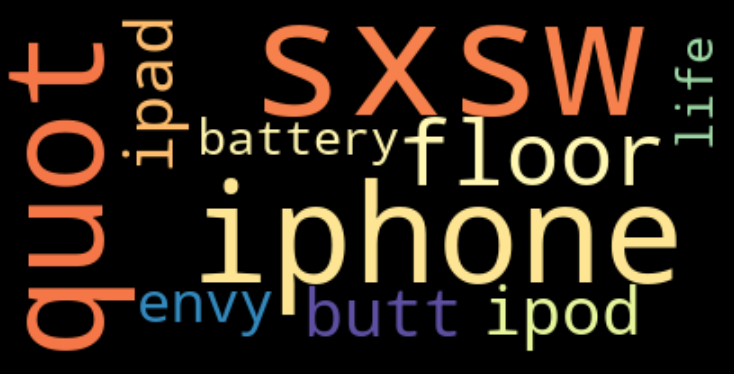

In [20]:
NN_neg = df.loc[df['vs_neg'] >= 0.5,'NN']
word_count_func2(NN_neg)

Overall vocab of subset: 27
25 most common words in subset:
[('sxsw', 20), ('mention', 11), ('iphone', 9), ('app', 3), ('quot', 3), ('link', 3), ('apple', 3), ('battery', 3), ('crisis', 2), ('ipad', 2), ('google', 2), ('bc', 2), ('time', 2), ('post', 2), ('card', 2), ('ipad2', 2), ('toilet', 1), ('apps', 1), ('sync', 1), ('timechange', 1), ('bloody', 1), ('batphone', 1), ('bomb', 1), ('convention', 1), ('center', 1)]
Word 		 Normalized Frequency

sxsw 		 0.1587
mention 		 0.0873
iphone 		 0.07143
app 		 0.02381
quot 		 0.02381
link 		 0.02381
apple 		 0.02381
battery 		 0.02381
crisis 		 0.01587
ipad 		 0.01587
google 		 0.01587
bc 		 0.01587
time 		 0.01587
post 		 0.01587
card 		 0.01587
ipad2 		 0.01587
toilet 		 0.007937
apps 		 0.007937
sync 		 0.007937
timechange 		 0.007937
bloody 		 0.007937
batphone 		 0.007937
bomb 		 0.007937
convention 		 0.007937
center 		 0.007937


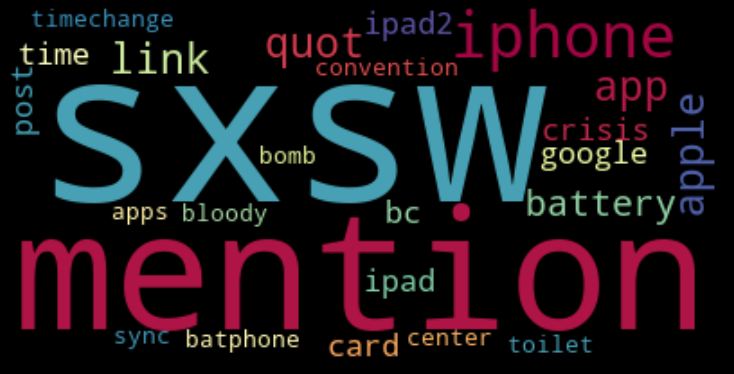

In [21]:
NN_neg2 = df.loc[df['vs_neg'] >= 0.4,'NN']
word_count_func2(NN_neg2)

Overall vocab of subset: 29
25 most common words in subset:
[('mention', 94), ('sxsw', 64), ('party', 34), ('link', 27), ('ipad', 19), ('iphone', 16), ('google', 9), ('com', 9), ('webdoc', 8), ('love', 7), ('music', 7), ('win', 6), ('fun', 6), ('year', 5), ('time', 4), ('quot', 4), ('friend', 4), ('app', 4), ('charger', 4), ('store', 4), ('ve', 4), ('celebrate', 4), ('dah', 4), ('ipad2', 3), ('everyone', 3)]
Word 		 Normalized Frequency

mention 		 0.1697
sxsw 		 0.1155
party 		 0.06137
link 		 0.04874
ipad 		 0.0343
iphone 		 0.02888
google 		 0.01625
com 		 0.01625
webdoc 		 0.01444
love 		 0.01264
music 		 0.01264
win 		 0.01083
fun 		 0.01083
year 		 0.009025
time 		 0.00722
quot 		 0.00722
friend 		 0.00722
app 		 0.00722
charger 		 0.00722
store 		 0.00722
ve 		 0.00722
celebrate 		 0.00722
dah 		 0.00722
ipad2 		 0.005415
everyone 		 0.005415


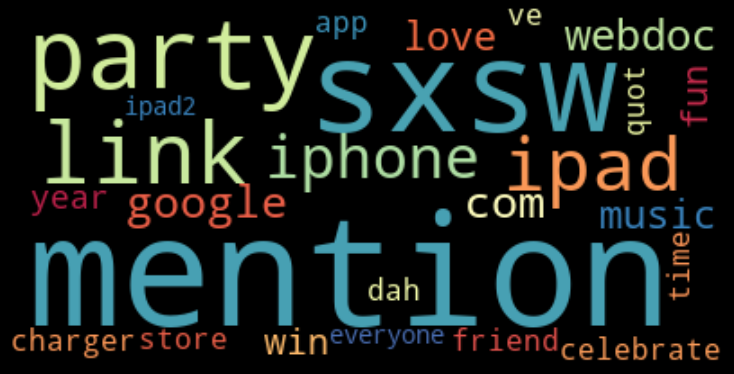

In [22]:
NN_pos = df.loc[df['vs_pos'] >= 0.5,'NN']
word_count_func2(NN_pos)

Overall vocab of subset: 32
25 most common words in subset:
[('mention', 312), ('sxsw', 194), ('link', 115), ('ipad', 71), ('party', 71), ('iphone', 64), ('quot', 30), ('app', 28), ('google', 28), ('music', 20), ('win', 19), ('com', 16), ('love', 15), ('amp', 15), ('store', 14), ('fun', 14), ('gt', 13), ('time', 13), ('food', 12), ('apple', 12), ('webdoc', 11), ('year', 10), ('design', 9), ('case', 9), ('city', 9)]
Word 		 Normalized Frequency

mention 		 0.1639
sxsw 		 0.1019
link 		 0.0604
ipad 		 0.03729
party 		 0.03729
iphone 		 0.03361
quot 		 0.01576
app 		 0.01471
google 		 0.01471
music 		 0.0105
win 		 0.009979
com 		 0.008403
love 		 0.007878
amp 		 0.007878
store 		 0.007353
fun 		 0.007353
gt 		 0.006828
time 		 0.006828
food 		 0.006303
apple 		 0.006303
webdoc 		 0.005777
year 		 0.005252
design 		 0.004727
case 		 0.004727
city 		 0.004727


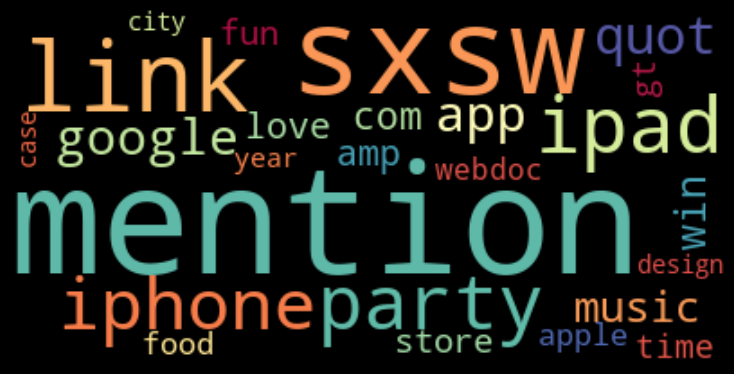

In [23]:
NN_pos2 = df.loc[df['vs_pos'] >= 0.4,'NN']
word_count_func2(NN_pos2)

### Subset by the provided labels
* The sample size for these analyses is tiny.  The cutpoints might be too restrictive

Overall vocab of subset: 36
25 most common words in subset:
[('mention', 2170), ('sxsw', 1152), ('link', 912), ('ipad', 597), ('iphone', 471), ('store', 396), ('quot', 242), ('app', 226), ('apple', 193), ('pop', 149), ('ipad2', 145), ('line', 124), ('party', 121), ('time', 118), ('google', 118), ('amp', 100), ('day', 99), ('launch', 74), ('downtown', 73), ('today', 71), ('popup', 59), ('technology', 48), ('sxswi', 46), ('year', 46), ('case', 45)]
Word 		 Normalized Frequency

mention 		 0.1598
sxsw 		 0.08482
link 		 0.06715
ipad 		 0.04396
iphone 		 0.03468
store 		 0.02916
quot 		 0.01782
app 		 0.01664
apple 		 0.01421
pop 		 0.01097
ipad2 		 0.01068
line 		 0.00913
party 		 0.00891
time 		 0.008689
google 		 0.008689
amp 		 0.007363
day 		 0.00729
launch 		 0.005449
downtown 		 0.005375
today 		 0.005228
popup 		 0.004344
technology 		 0.003534
sxswi 		 0.003387
year 		 0.003387
case 		 0.003313


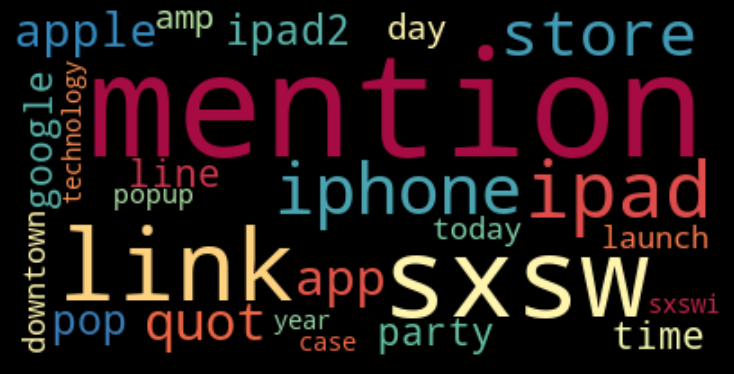

In [24]:
NN_poslabel = df.loc[df['emotion'] == 1,'NN']
word_count_func2(NN_poslabel)

Overall vocab of subset: 31
25 most common words in subset:
[('mention', 307), ('sxsw', 249), ('iphone', 147), ('quot', 104), ('ipad', 96), ('link', 67), ('app', 37), ('store', 29), ('apple', 20), ('news', 18), ('google', 18), ('design', 17), ('apps', 17), ('amp', 16), ('day', 16), ('time', 16), ('line', 15), ('battery', 15), ('money', 14), ('today', 14), ('company', 13), ('way', 13), ('room', 13), ('ve', 12), ('thing', 12)]
Word 		 Normalized Frequency

mention 		 0.1215
sxsw 		 0.09854
iphone 		 0.05817
quot 		 0.04116
ipad 		 0.03799
link 		 0.02651
app 		 0.01464
store 		 0.01148
apple 		 0.007915
news 		 0.007123
google 		 0.007123
design 		 0.006727
apps 		 0.006727
amp 		 0.006332
day 		 0.006332
time 		 0.006332
line 		 0.005936
battery 		 0.005936
money 		 0.00554
today 		 0.00554
company 		 0.005144
way 		 0.005144
room 		 0.005144
ve 		 0.004749
thing 		 0.004749


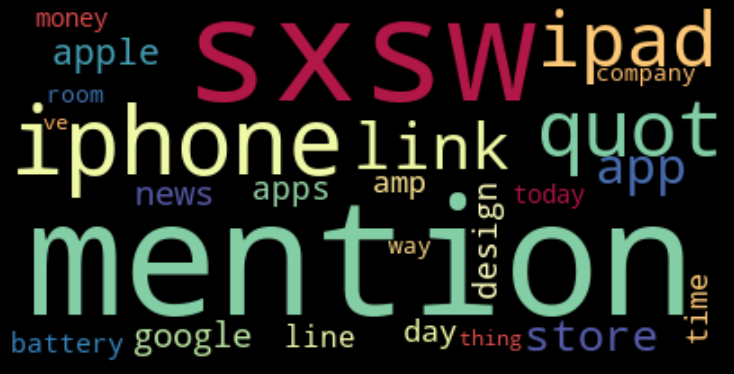

In [25]:
NN_neglabel = df.loc[df['emotion'] == 0,'NN']
word_count_func2(NN_neglabel)

#### Positive Apple

Overall vocab of subset: 35
25 most common words in subset:
[('mention', 1420), ('sxsw', 682), ('link', 644), ('ipad', 545), ('iphone', 410), ('store', 367), ('app', 182), ('apple', 180), ('pop', 139), ('quot', 135), ('ipad2', 131), ('line', 111), ('downtown', 69), ('amp', 65), ('time', 65), ('day', 61), ('launch', 54), ('popup', 51), ('today', 46), ('technology', 43), ('don', 39), ('opening', 39), ('case', 38), ('shop', 37), ('year', 36)]
Word 		 Normalized Frequency

mention 		 0.1539
sxsw 		 0.07392
link 		 0.0698
ipad 		 0.05907
iphone 		 0.04444
store 		 0.03978
app 		 0.01973
apple 		 0.01951
pop 		 0.01507
quot 		 0.01463
ipad2 		 0.0142
line 		 0.01203
downtown 		 0.007479
amp 		 0.007045
time 		 0.007045
day 		 0.006612
launch 		 0.005853
popup 		 0.005528
today 		 0.004986
technology 		 0.004661
don 		 0.004227
opening 		 0.004227
case 		 0.004119
shop 		 0.00401
year 		 0.003902


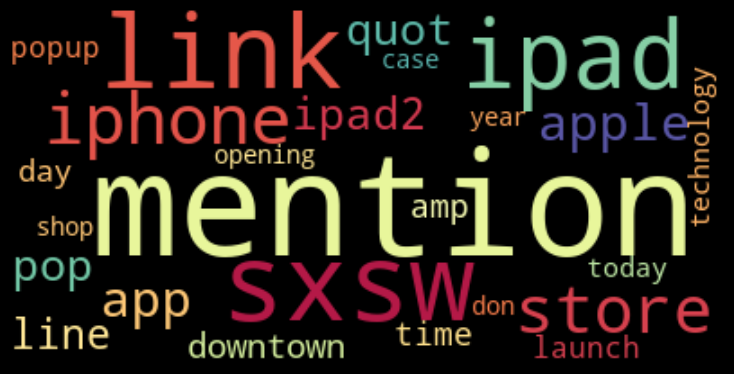

In [26]:
NN_pos_apple = df.loc[(df['emotion'] == 1)&(df['product_agg'] == 'Apple'),'NN']
word_count_func2(NN_pos_apple)

Overall vocab of subset: 29
25 most common words in subset:
[('mention', 191), ('sxsw', 160), ('iphone', 134), ('ipad', 93), ('quot', 72), ('link', 42), ('app', 28), ('store', 28), ('apple', 20), ('design', 16), ('news', 16), ('apps', 15), ('amp', 15), ('battery', 15), ('line', 13), ('company', 13), ('time', 12), ('money', 11), ('day', 11), ('year', 10), ('ve', 10), ('pop', 10), ('thing', 9), ('nothing', 9), ('ipad2', 8)]
Word 		 Normalized Frequency

mention 		 0.1102
sxsw 		 0.09233
iphone 		 0.07732
ipad 		 0.05366
quot 		 0.04155
link 		 0.02424
app 		 0.01616
store 		 0.01616
apple 		 0.01154
design 		 0.009233
news 		 0.009233
apps 		 0.008656
amp 		 0.008656
battery 		 0.008656
line 		 0.007501
company 		 0.007501
time 		 0.006924
money 		 0.006347
day 		 0.006347
year 		 0.00577
ve 		 0.00577
pop 		 0.00577
thing 		 0.005193
nothing 		 0.005193
ipad2 		 0.004616


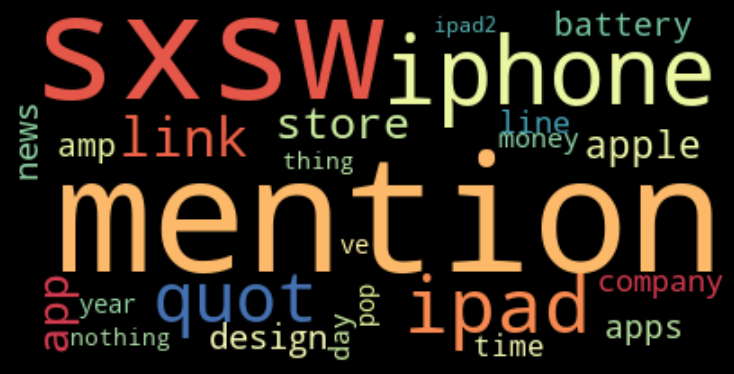

In [27]:
NN_neg_apple = df.loc[(df['emotion'] == 0)&(df['product_agg'] == 'Apple'),'NN']
word_count_func2(NN_neg_apple)

Overall vocab of subset: 33
25 most common words in subset:
[('mention', 398), ('sxsw', 285), ('link', 126), ('google', 109), ('quot', 76), ('party', 69), ('time', 34), ('day', 29), ('search', 24), ('network', 22), ('traffic', 22), ('panel', 19), ('today', 16), ('route', 16), ('launch', 15), ('location', 15), ('amp', 14), ('art', 13), ('gt', 12), ('world', 11), ('stuff', 10), ('work', 10), ('session', 10), ('fun', 10), ('hotpot', 9)]
Word 		 Normalized Frequency

mention 		 0.1649
sxsw 		 0.1181
link 		 0.0522
google 		 0.04515
quot 		 0.03148
party 		 0.02858
time 		 0.01408
day 		 0.01201
search 		 0.009942
network 		 0.009114
traffic 		 0.009114
panel 		 0.007871
today 		 0.006628
route 		 0.006628
launch 		 0.006214
location 		 0.006214
amp 		 0.0058
art 		 0.005385
gt 		 0.004971
world 		 0.004557
stuff 		 0.004143
work 		 0.004143
session 		 0.004143
fun 		 0.004143
hotpot 		 0.003728


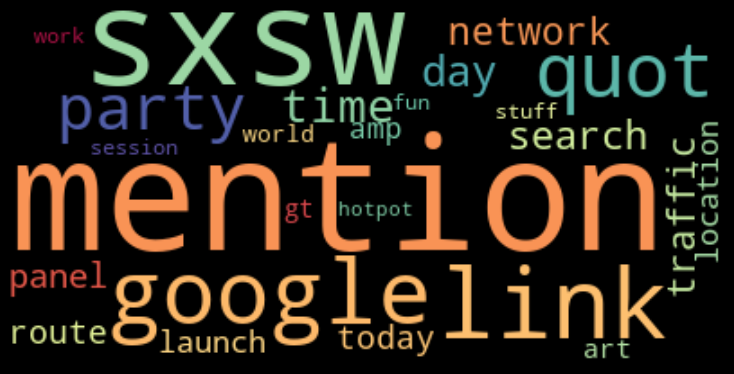

In [28]:
NN_pos_google = df.loc[(df['emotion'] == 1)&(df['product_agg'] == 'Google'),'NN']
word_count_func2(NN_pos_google)

Overall vocab of subset: 27
25 most common words in subset:
[('mention', 79), ('sxsw', 57), ('quot', 23), ('link', 18), ('google', 15), ('today', 9), ('product', 8), ('location', 6), ('tag', 5), ('way', 5), ('business', 5), ('service', 5), ('room', 5), ('tv', 5), ('vs', 4), ('search', 4), ('title', 4), ('gt', 4), ('network', 4), ('panel', 3), ('community', 3), ('solution', 3), ('pnid', 3), ('world', 3), ('innovation', 3)]
Word 		 Normalized Frequency

mention 		 0.159
sxsw 		 0.1147
quot 		 0.04628
link 		 0.03622
google 		 0.03018
today 		 0.01811
product 		 0.0161
location 		 0.01207
tag 		 0.01006
way 		 0.01006
business 		 0.01006
service 		 0.01006
room 		 0.01006
tv 		 0.01006
vs 		 0.008048
search 		 0.008048
title 		 0.008048
gt 		 0.008048
network 		 0.008048
panel 		 0.006036
community 		 0.006036
solution 		 0.006036
pnid 		 0.006036
world 		 0.006036
innovation 		 0.006036


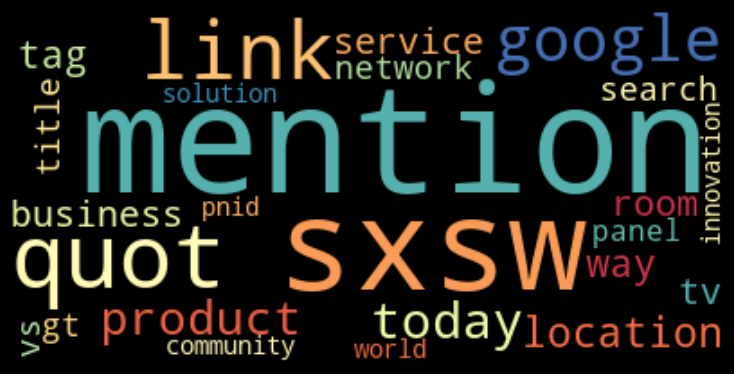

In [29]:
NN_neg_google = df.loc[(df['emotion'] == 0)&(df['product_agg'] == 'Google'),'NN']
word_count_func2(NN_neg_google)